In [14]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

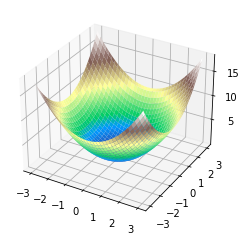

In [15]:
# 3D plotting test
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

data = np.linspace(-3, 3, 70)
x, y = np.meshgrid(data, data)
z = x**2 + y**2

ax.plot_surface(x,y,z, cmap='terrain')
#x.shape, z.shape, x, z

In [41]:
def function_2(x):
    return x[0]**2 + x[1]**2

def __function_2(x):
    return (x**2).sum()

X = np.array([3, 4])
#print(X)
#print(function_2(X))
#print(__function_2(X))
(function_2(X)==__function_2(X)).all()

True

In [57]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        #print(fxh1, fxh2)
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad

# Test
f = lambda x: (x**2).sum()
X = np.array([3.0, 4.0])
_numerical_gradient_no_batch(f, X)

array([6., 8.])

In [210]:
# my own version since the above doesn't work
def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    l = [(f(x[i]+h) - f(x[i]-h)) / (2*h) for i in range(x.size)]
    return np.array(l)

# Test
f = lambda x:(x**2).sum()
X = np.array([3.0, 4.0])
_numerical_gradient_no_batch(f, X)

def my_numerical_gradient_no_batch(f, Xs):
    l = [_numerical_gradient_no_batch(f, xc) for xc in Xs]
    return np.array(l)

f = lambda x: (x**2).sum()
Xs = np.array([[0,0],[1,2],[3,4]])
my_numerical_gradient_no_batch(f, Xs)

array([[0., 0.],
       [2., 4.],
       [6., 8.]])

In [186]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad
    
    
f = lambda x:x**2
#X = np.arange(10).reshape(5,2)
X = np.array([[0,0],[3,4]])
#print(X)
print(numerical_gradient(f, X))
print(my_numerical_gradient_no_batch(f, X))

[[0 0]
 [6 7]]
[[0.0, 0.0], [6.000000000012662, 7.999999999999119]]


In [89]:
numerical_gradient = my_numerical_gradient_no_batch
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

In [201]:
x = np.arange(1,5) # [0,1,2]
X = np.meshgrid(x, x)
#print(f"np.array(X).shape={np.array(X).shape}")
#print(f"X[0]:\n{X[0]}")
#print(f"X[1]:\n{X[1]}")
#print(f"X[0].flatten: {X[0].flatten()}")
#print(f"X[1].flatten: {X[1].flatten()}")
X0, X1 = X[0].flatten(), X[1].flatten() 
Xs = np.stack([X0, X1], axis=1)
print(f"Xs.shape={Xs.shape}")
#Xs = np.array([[0,0],[1,2],[3,4]])
grad = my_numerical_gradient_no_batch(lambda x: (x**2).sum(), Xs)
Xs[-2], grad[-2]

Xs.shape=(16, 2)


(array([3, 4]), [6.000000000012662, 7.999999999999119])

(2025,) (2025,)
(2025, 2)


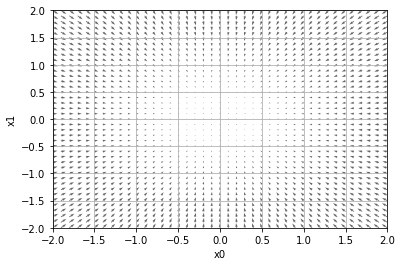

In [209]:
#if __name__ == '__main__':
if True:
    x = np.arange(-2, 2.5, 0.1)
    X, Y = np.meshgrid(x, x)
    X, Y = X.flatten(), Y.flatten()
    Xs = np.stack([X, Y], axis=1)
    grad = my_numerical_gradient_no_batch(lambda x: (x**2).sum(), Xs)
    #print(grad)
    plt.figure()
    print(X.shape, Y.shape)
    print(grad.shape)
    plt.quiver(X, Y, -grad[:,0], -grad[:,1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()